## mouse RNAseq data를 이용한 target screening
* RNAseq data를 전저리한 뒤, 원하는 조건을 만족하는 target을 알아내는 방법을 알아보자
---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
df = pd.read_excel('./RNAseq_result.xlsx')

In [3]:
df.head()

,target_id,WT1,WT2,WT3,Treat1,Treat2,Treat3,Treat4,Treat5,Treat6
0,ENSMUST00000177564.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ENSMUST00000196221.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ENSMUST00000179664.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ENSMUST00000178537.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ENSMUST00000178862.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#df에서 id를 제외하고 array 생성
matrix = df.values[:,1:]

#sklearn에서 제공하는 scale 함수를 이용한 zscore 작성
zscore = scale(matrix, axis = 1)

#각 반복실험 사이의 차이가 큰 경우를 제외하기
wt_mean = np.mean(zscore[:,:3], axis = 1)
wt_std = np.std(zscore[:,:3], axis = 1)

treat_mean = np.mean(zscore[:,3:9], axis = 1)
treat_std = np.std(zscore[:,3:9], axis = 1)

#실험 간 편차가 작은 경우만 표시하도록 마스킹 준비
stable_expression_wt = wt_std<0.5
stable_expression_treat = treat_std<0.5

diff = wt_mean-treat_mean

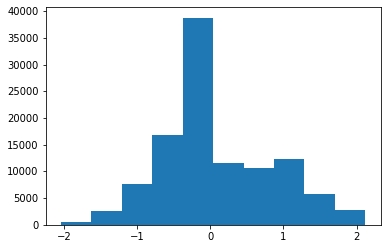

In [9]:
plt.hist(diff)
plt.show()

In [10]:
wt_high_than_treat = diff>1
treat_high_than_wt = diff<-1

set1 = wt_high_than_treat&stable_expression_treat&stable_expression_wt
set2 = treat_high_than_wt&stable_expression_treat&stable_expression_wt

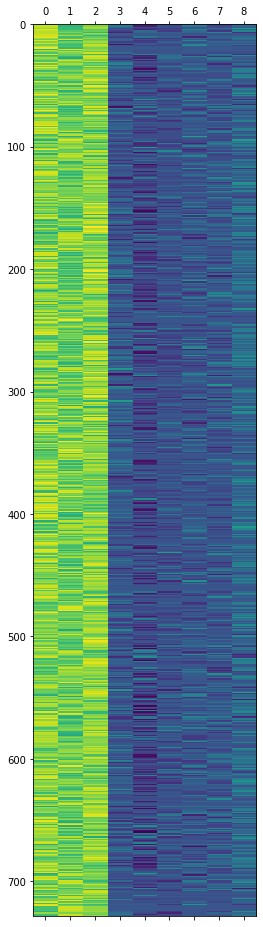

In [11]:
#nonzero() : array에서 0 (또는 Flase) 값이 아닌 위치를 인덱싱
plt.matshow(zscore[set1.nonzero()[0]],aspect='auto')
plt.show()

In [12]:
#set1과 set2를 모두 만족하는 target 표시
set_all = list(set1.nonzero()[0]) + list(set2.nonzero()[0])

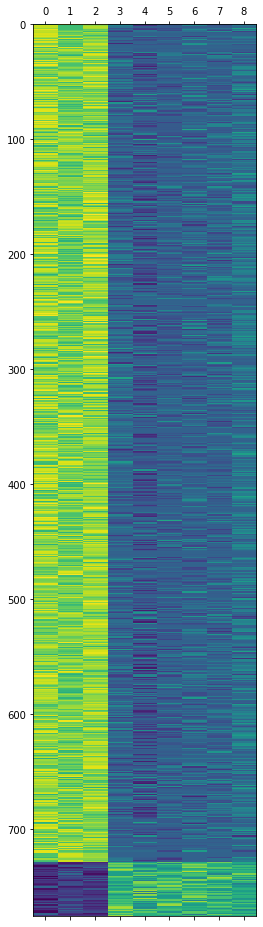

In [13]:
plt.matshow(zscore[set_all],aspect='auto')
plt.show()

In [14]:
mrnas = df['target_id'].values

In [15]:
mrnas[set_all][0:5] #set1 & set2 조건을 만족하는 유전자 이름 5개 표시

array(['ENSMUST00000188251.6', 'ENSMUST00000183291.1',
       'ENSMUST00000103205.10', 'ENSMUST00000166505.6',
       'ENSMUST00000033009.15'], dtype=object)

---
* ex)앞서 작업한 결과물을 이용해 mouse gene을 screening해 보자
---

In [16]:
df_annot = pd.read_csv('./mouse_genes_GRCm38.p5_transcript_version.txt',sep='\t', index_col = -1)
#gene의 ID와 이름을 대응한 파일 적용

In [17]:
df_annot.head()

,Gene stable ID,Transcript stable ID,Gene name,Gene description
Transcript stable ID version,,,,
ENSMUST00000082423.1,ENSMUSG00000064372,ENSMUST00000082423,mt-Tp,mitochondrially encoded tRNA proline [Source:M...
ENSMUST00000082422.1,ENSMUSG00000064371,ENSMUST00000082422,mt-Tt,mitochondrially encoded tRNA threonine [Source...
ENSMUST00000082421.1,ENSMUSG00000064370,ENSMUST00000082421,mt-Cytb,mitochondrially encoded cytochrome b [Source:M...
ENSMUST00000082420.1,ENSMUSG00000064369,ENSMUST00000082420,mt-Te,mitochondrially encoded tRNA glutamic acid [So...
ENSMUST00000082419.1,ENSMUSG00000064368,ENSMUST00000082419,mt-Nd6,mitochondrially encoded NADH dehydrogenase 6 [...


In [19]:
#set2 = treat_high_than_wt&stable_expression_treat&stable_expression_wt
#mrnas = df['target_id'].values
#mrnas와 set2를 이용해 masking 후, 해당하는 Gene name을 반환한다.

df_annot.loc[mrnas[set2]]['Gene name'].values

array(['Gmppa', 'Dcst2', 'Ifngr2', 'Pgbd5', 'Pikfyve', 'Slc25a37',
       'Tmem120a', '4930533O14Rik', 'Tubb4a', 'Mlana', 'Armc7', 'Rnh1',
       'Fchsd2', '5031439G07Rik', 'Fam213a', 'Rapgef3', 'Nsmf', 'Dad1',
       'Capn10', 'Mapk8ip1', 'Dnmt3b', 'Syngr1', 'Fhdc1', 'Nyap1', 'Patj',
       'Mical3', 'Agpat3', 'Tyr', 'Stx7', 'Msi1', 'Cd48', 'Dbnl',
       'Zfp691', 'Atp6v0c', 'Gimap9', 'Rab3gap1', 'Bcl2l1', 'Pdk2',
       'Naif1', 'Slc45a2', 'Npc2', 'Dusp2', 'Atp6v0b', 'Hsf4', 'Otos',
       'Traf3ip3', 'Faf2'], dtype=object)